In [1]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Helpers
import helpers
import acquire

# Baseline modeling

In [2]:
from sklearn.linear_model import LinearRegression
from helpers.eval import BaselineModel

In [3]:
df = acquire.both_get_data()
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
df = df.reset_index().drop(columns='index')
train, test , validate = helpers.prep.train_test_validate_split(df)

In [4]:
train.type.value_counts(normalize=True), test.type.value_counts(normalize=True), validate.type.value_counts(normalize=True)

(white    0.757055
 red      0.242945
 Name: type, dtype: float64,
 white    0.744419
 red      0.255581
 Name: type, dtype: float64,
 white    0.753846
 red      0.246154
 Name: type, dtype: float64)

In [5]:
fs = (train, test, validate)
tx, sx, vx = (f['alcohol'] for f in fs)
ty, sy, vy = (f['quality'] for f in fs)

In [6]:
baseMean = BaselineModel()
baseLin = LinearRegression(positive=True, fit_intercept=True)

In [7]:
baseMean.fit(tx, ty)
baseLin.fit(tx.to_numpy().reshape(-1, 1), ty)

LinearRegression(positive=True)

In [8]:
tp1 = baseMean.predict(tx)
tp2 = baseLin.predict(tx.to_numpy().reshape(-1,1))

In [9]:
helpers.eval.regression_metrics(ty, tp1),\
helpers.eval.regression_metrics(ty, tp2)

({'max_error': 3.184710107747563,
  'sum_squared_error': 3035.008722421755,
  'mean_squared_error': 0.7786066501851603,
  'root_mean_squared_error': 0.8823869050394846,
  'mean_absolute_error': 0.6927274014828091,
  'r2_score': 0.0},
 {'max_error': 3.508716605746711,
  'sum_squared_error': 2433.813345097285,
  'mean_squared_error': 0.6243748961255221,
  'root_mean_squared_error': 0.7901739657350918,
  'mean_absolute_error': 0.624088331870634,
  'r2_score': 0.19808686969596323})

In [44]:
ty.shape, tp2.shape

((3898, 1), (3898,))

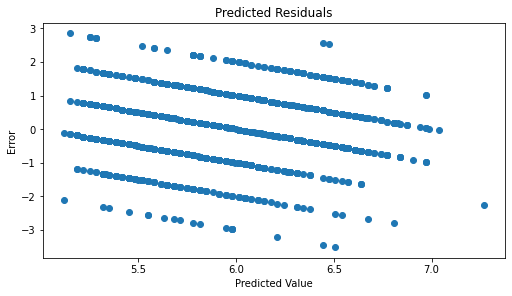

In [10]:
helpers.eval.plot_residuals(ty, tp2)

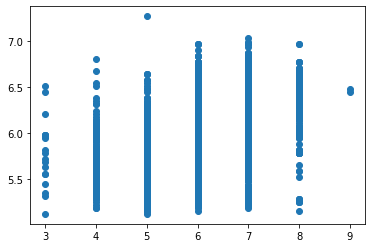

In [11]:
plt.scatter(train.quality, tp2)

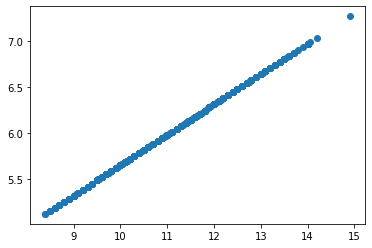

In [12]:
plt.scatter(train.alcohol, tp2)

## Multinomial logistic regression

In [60]:
targets = ['quality']
features = ['alcohol','chlorides','volatile_acidity']

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', multi_class='ovr')
# model = LogisticRegression(class_weight=None)


In [86]:
fs = (train, test, validate)
tx, sx, vx = (f[features] for f in fs)
tup = (tx, sx, vx)
ty, sy, vy = (f[targets] for f in fs)

In [87]:
scaler = helpers.prep.train_scaler(tx)

In [88]:
txs, sxs, vxs = (helpers.prep.scale_df(f, scaler) for f in tup)

In [89]:

model.fit(txs, ty)

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', multi_class='ovr')

In [90]:
tpred = model.predict(txs)

In [91]:
ty.shape, tpred.shape

((3898, 1), (3898,))

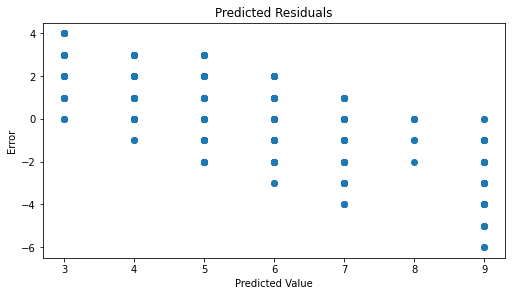

In [92]:
helpers.eval.plot_residuals(ty, tpred.reshape(-1,1))

In [93]:
helpers.eval.regression_metrics(ty, tpred.reshape(-1,1))

{'max_error': 6,
 'sum_squared_error': quality    7176
 dtype: int64,
 'mean_squared_error': 1.840944073884043,
 'root_mean_squared_error': 1.356813942250021,
 'mean_absolute_error': 0.944073884043099,
 'r2_score': -1.364408361328854}

### Drop the noise

In [94]:
alt_train = train[(train.quality > 7)| (train.quality < 5)]

In [98]:
fs = (train, test, validate)
tx, sx, vx = (f[features] for f in fs)
tup = (tx, sx, vx)
ty, sy, vy = (f[targets] for f in fs)
scaler = helpers.prep.train_scaler(tx)
txs, sxs, vxs = (helpers.prep.scale_df(f, scaler) for f in tup)

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


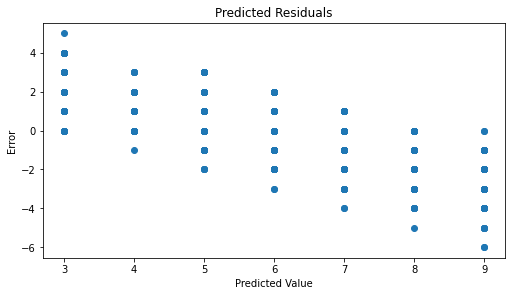

In [99]:
model = LogisticRegression(class_weight='balanced')
model.fit(txs, ty)
tpred = model.predict(txs)
helpers.eval.plot_residuals(ty, tpred.reshape(-1,1))

In [100]:
helpers.eval.regression_metrics(ty, tpred.reshape(-1,1))

{'max_error': 6,
 'sum_squared_error': quality    9621
 dtype: int64,
 'mean_squared_error': 2.4681888147768087,
 'root_mean_squared_error': 1.5710470441004651,
 'mean_absolute_error': 1.1654694715238585,
 'r2_score': -2.1700073640391446}